# About

Try to detect crime hotspots for each Category of crime, and distance from the epicenters.

* not sure how to handle crimes that have stringy structures based on streets
* or have multiple hotspots

In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

%matplotlib inline

%reload_ext autoreload
%autoreload 2
from src.features.build_features import DataFrameSelector, SFCCTransformer, print_summary

In [3]:
# loads data
train_pd = pd.read_csv("../data/raw/train.csv.zip", compression="zip")
test_pd = pd.read_csv("../data/raw/test.csv.zip", compression="zip")

# Outliers

Some crimes are oddly very much outside city limits, and all overlap each other

* we should ignore these outliers; their X and Y are probably miscoded
* affects about 67 records in train and 76 records in test
* latitude Y = 50 appears to be a good cut off

In [4]:
latitude_outlier = 50

In [5]:
train_pd[["X", "Y"]].query("Y >= @latitude_outlier").count()

X    67
Y    67
dtype: int64

In [6]:
test_pd[["X", "Y"]].query("Y >= @latitude_outlier").count()

X    76
Y    76
dtype: int64

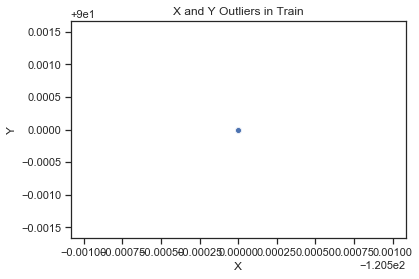

In [7]:
outliers = train_pd[["X", "Y"]].query("Y >= @latitude_outlier")

ax = sns.scatterplot(x="X", y="Y", data=outliers).set_title("X and Y Outliers in Train")
plt.show()

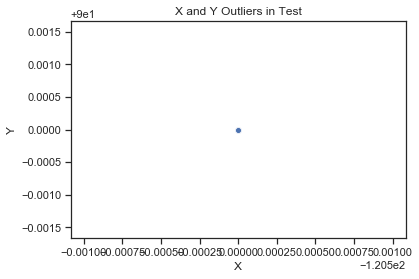

In [8]:
outliers = test_pd[["X", "Y"]].query("Y >= @latitude_outlier")

ax = sns.scatterplot(x="X", y="Y", data=outliers).set_title("X and Y Outliers in Test")
plt.show()

# Visual Check of X and Y

* most Categories of crimes might have something approximating a central hotspot (e.g. vandalism, theft)
* but some might have multiple hotspots (e.g. prostitution, runaway)
* and the hexbin shows some Categories might have stringy structures based on streets  

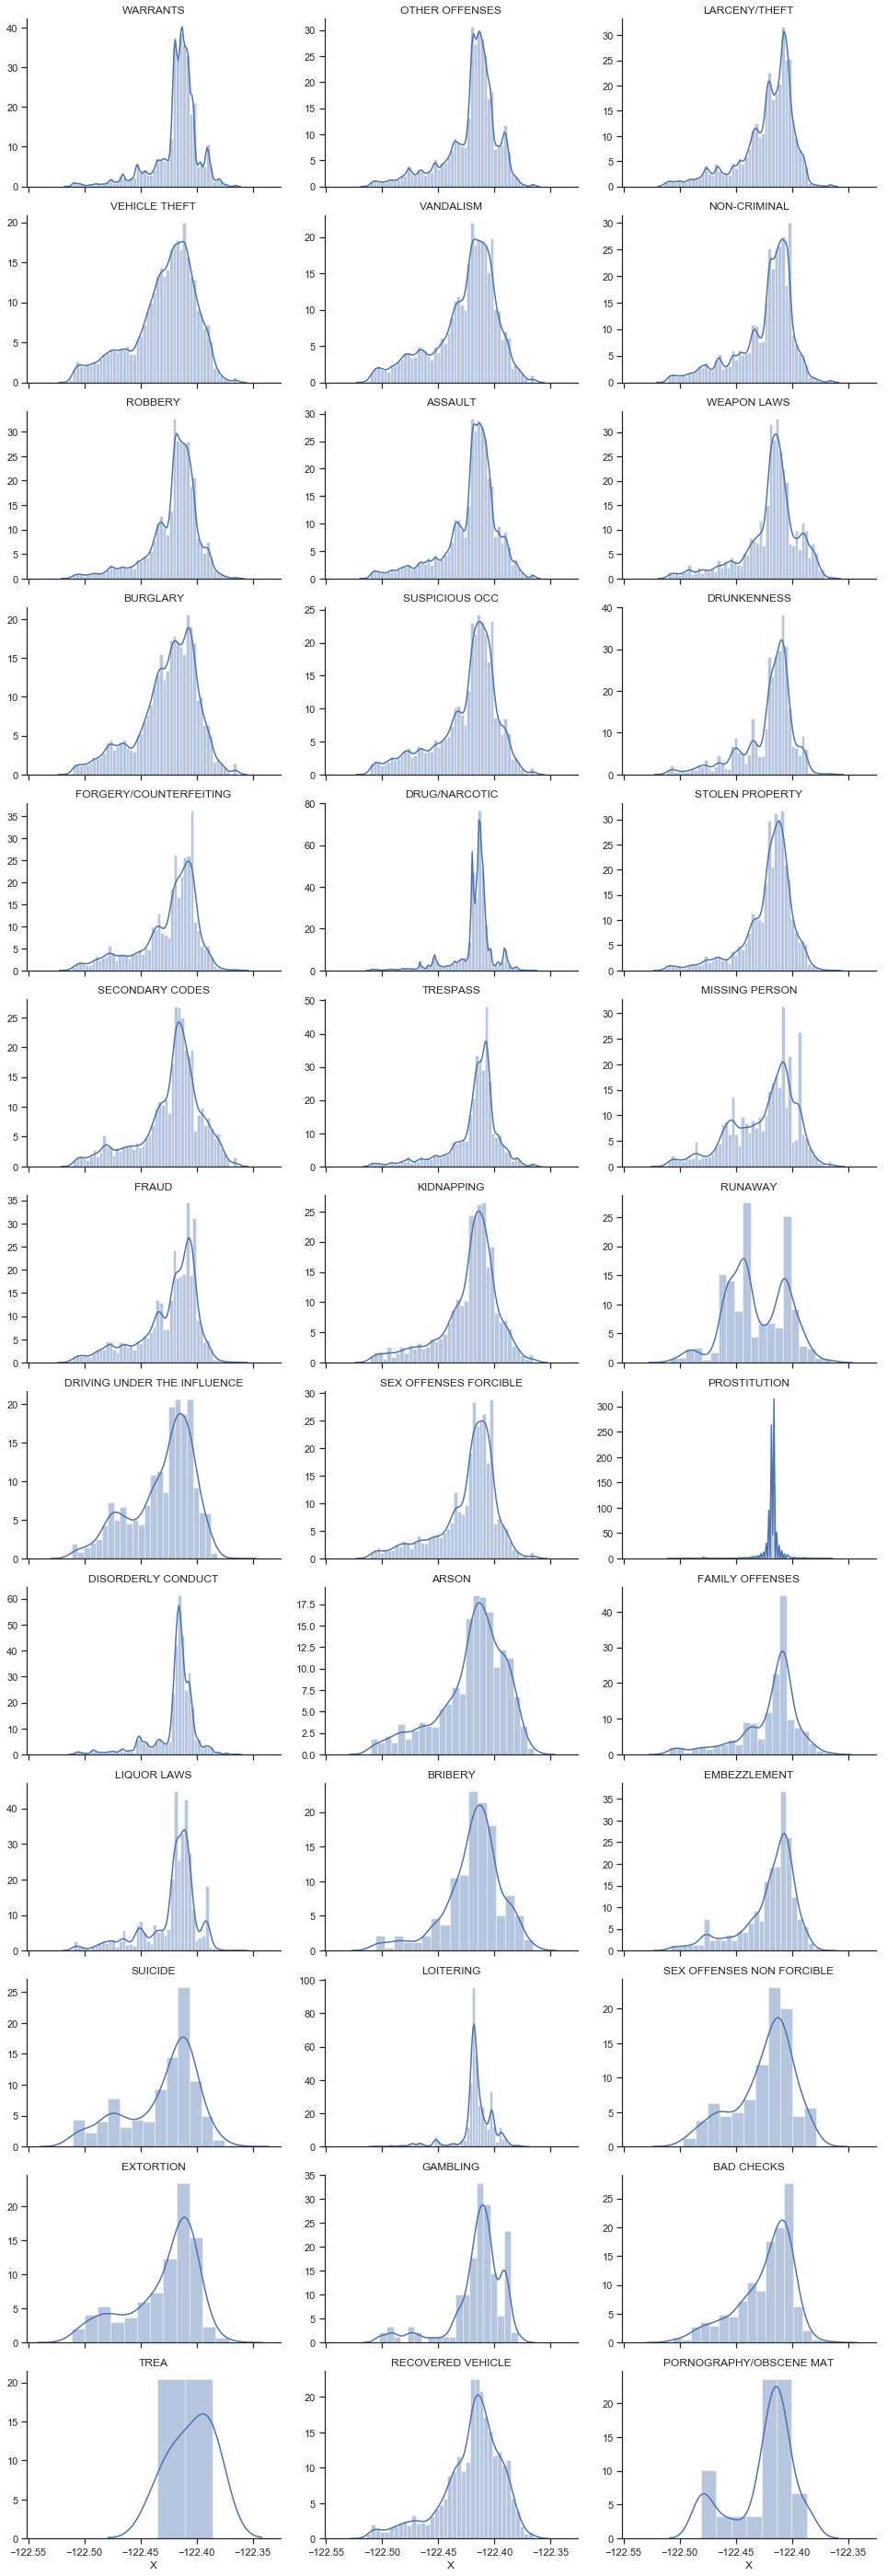

In [15]:
# Distribution of longitudes X
city = train_pd[["Category", "X", "Y"]].query("Y < @latitude_outlier")

ax = sns.FacetGrid(city, col = "Category", col_wrap = 3, height = 3, aspect = 1.5, sharex = True, sharey = False)
ax = ax.map(sns.distplot, "X", kde = True)
ax.set_titles("{col_name}")
plt.show()

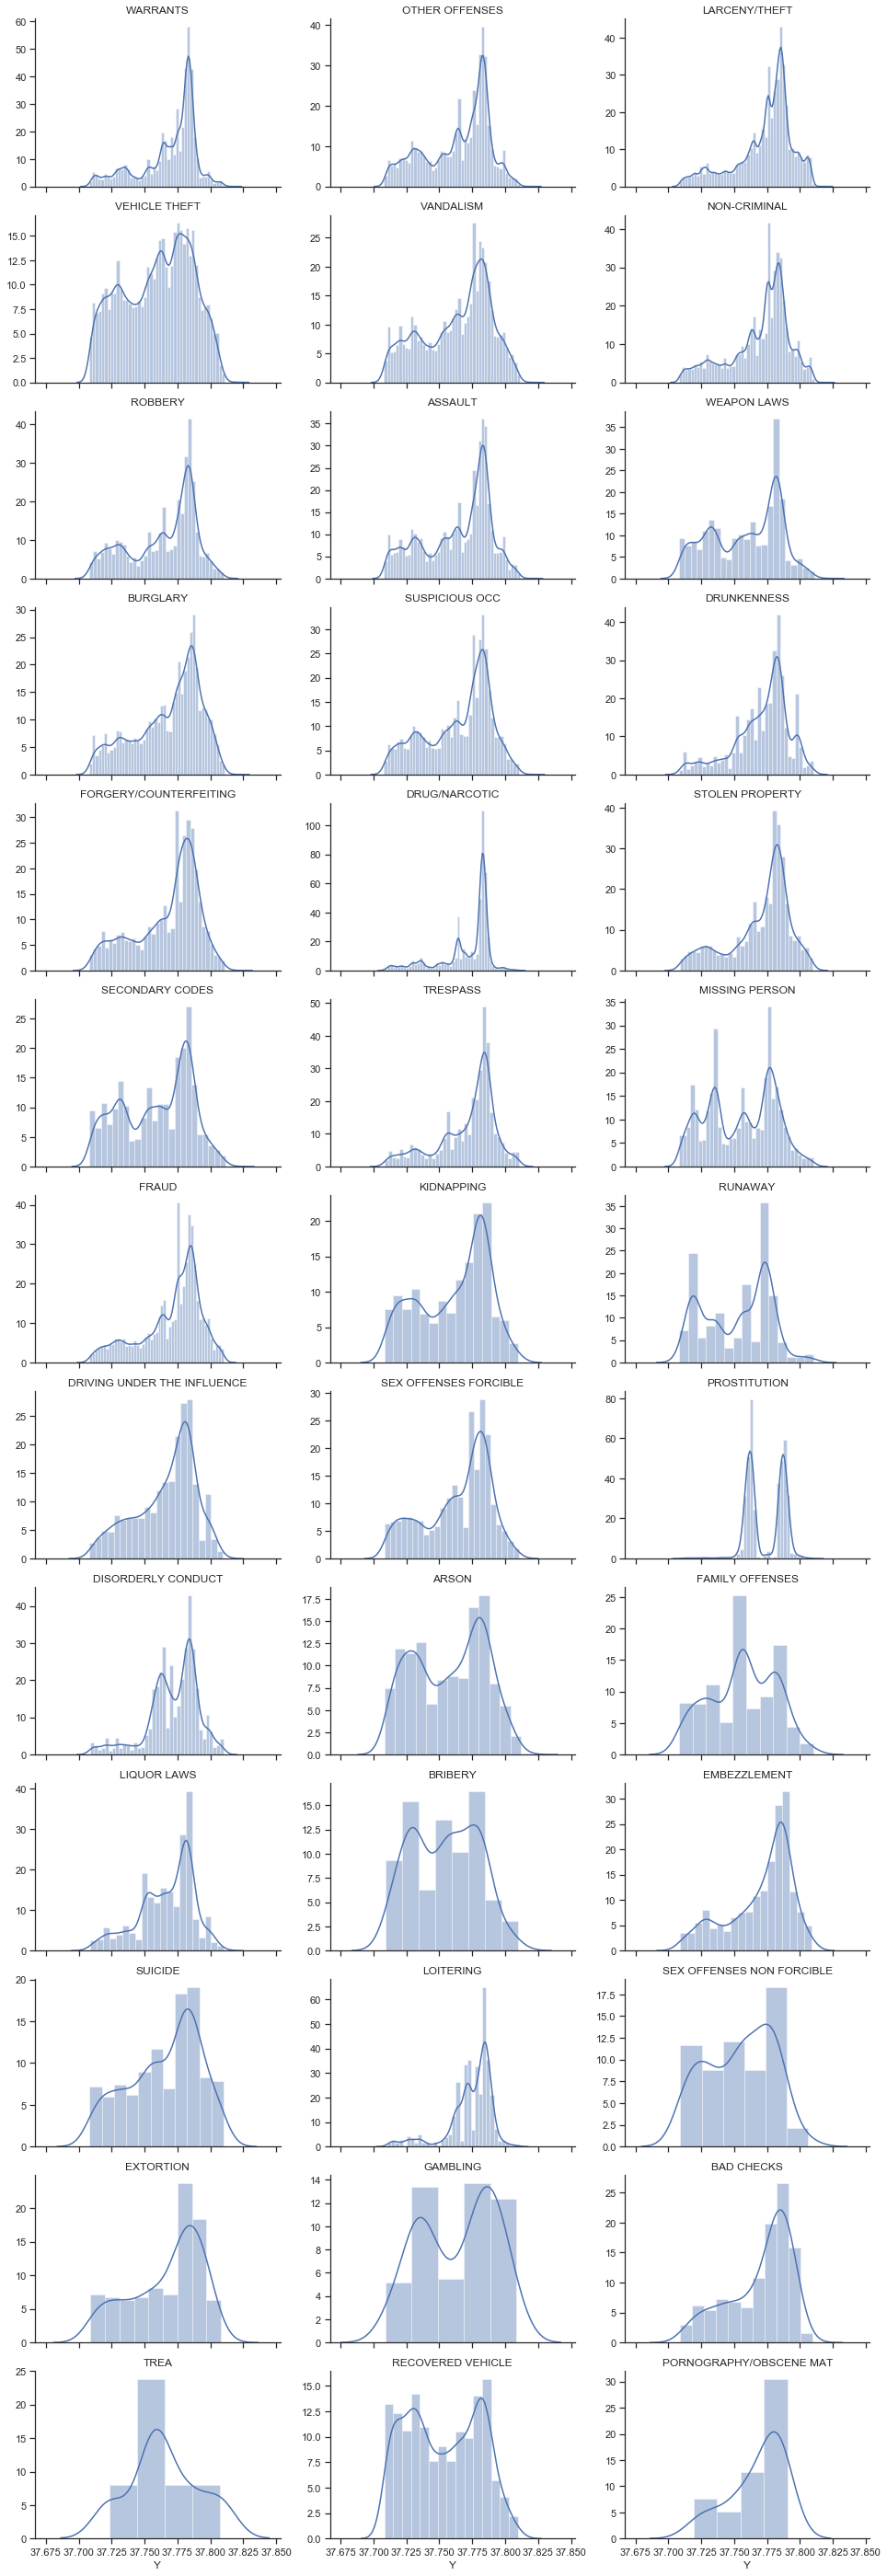

In [16]:
# Distribution of latitudes Y
city = train_pd[["Category", "X", "Y"]].query("Y < @latitude_outlier")

g = sns.FacetGrid(city, col = "Category", col_wrap = 3, height = 3, aspect = 1.5, sharex = True, sharey = False)
g = g.map(sns.distplot, "Y", kde = True)
g.set_titles("{col_name}")
plt.show()

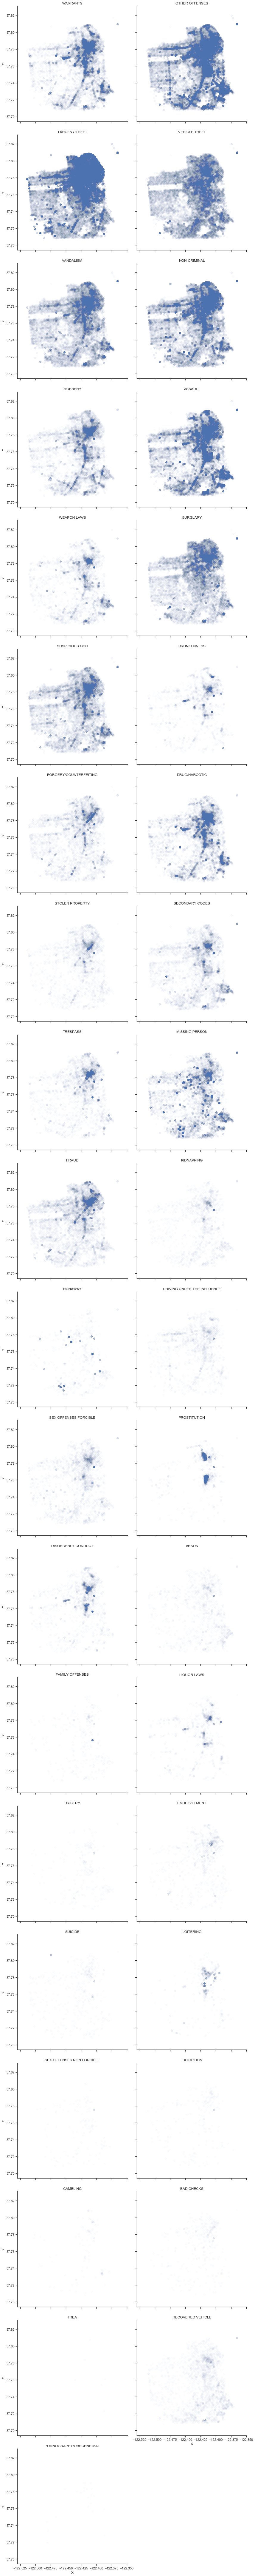

In [11]:
# scatter plot of long X and lat Y
city = train_pd[["Category", "X", "Y"]].query("Y < @latitude_outlier")

ax = sns.FacetGrid(city, col = "Category", col_wrap = 2, height = 6, aspect = 1, sharex = True, sharey = True)
ax = ax.map(plt.scatter, "X", "Y", alpha = 0.01)
ax.set_titles("{col_name}")
plt.show()

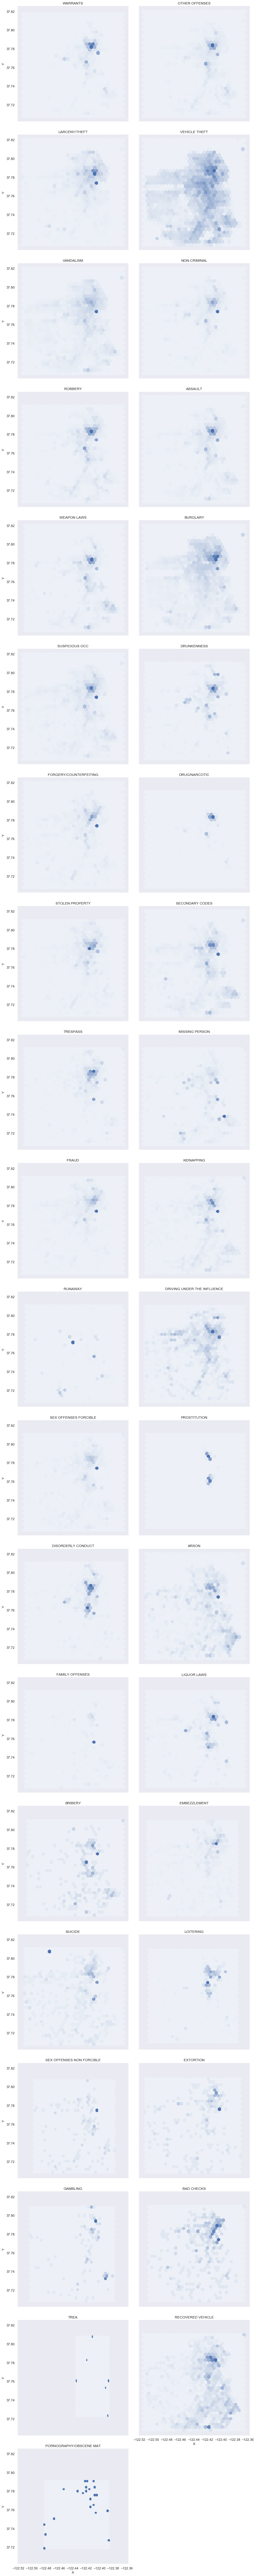

In [12]:
# hexbin of long X and lat Y
# https://seaborn.pydata.org/tutorial/axis_grids.html
city = train_pd[["Category", "X", "Y"]].query("Y < @latitude_outlier")

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap = True)
    plt.hexbin(x, y, gridsize = 30, cmap = cmap, **kwargs)

with sns.axes_style("dark"):
    ax = sns.FacetGrid(city, col = "Category", col_wrap = 2, height = 6, aspect = 1, sharex = True, sharey = True)
ax = ax.map(hexbin, "X", "Y")
ax.set_titles("{col_name}")
plt.show()

In [17]:
# TODO clusters!!!